In [1]:
#imports
!pip install geopy
!pip install geopandas
import geopandas as gpd
#from geopy.geocoders import Nominatim
import pandas as pd
import os
import matplotlib.pyplot as plt

## Read in Data

In [2]:
#file input
file_name = '/home/jovyan/geo_data/County_by_County_Demographics.csv'

In [3]:
#create dataframe for county demographic data
df = pd.read_csv(file_name) 
df

,GISJOIN,YEAR,STATE,STATEA,COUNTY,COUNTYA,AREANAME,STATEICP,COUNTYICP,Unnamed: 9,...,AH4003,AH4004,AH4005,AH4006,AH4007,AH4008,AH4009,AH4010,AH4011,AH4012
0,GIS Join Match Code,Data File Year,State Name,State Code,County Name,County Code,Area name,ICPSR State Code,ICPSR County Code,Percent of Free Population who are Foreign Bor...,...,Native-born >> Black >> Male,Native-born >> Black >> Female,Native-born >> Mulatto >> Male,Native-born >> Mulatto >> Female,Foreign-born >> White >> Male,Foreign-born >> White >> Female,Foreign-born >> Black >> Male,Foreign-born >> Black >> Female,Foreign-born >> Mulatto >> Male,Foreign-born >> Mulatto >> Female
1,G0100010,1860,Alabama,10,Autauga,10,Autauga,41,10,0.00167274,...,7,5,0,2,28,2,0,0,0,0
2,G0100030,1860,Alabama,10,Baldwin,30,Baldwin,41,30,0.045285525,...,4,2,63,71,341,86,0,0,0,0
3,G0100050,1860,Alabama,10,Barbour,50,Barbour,41,50,0.005030508,...,3,8,17,5,155,54,0,0,0,0
4,G0100070,1860,Alabama,10,Bibb,70,Bibb,41,70,0.001765596,...,0,0,9,16,21,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,G5501330,1860,Wisconsin,550,Waukesha,1330,Waukesha,25,1330,0.211881779,...,16,13,3,2,5685,4662,0,0,0,0
2099,G5501350,1860,Wisconsin,550,Waupaca,1350,Waupaca,25,1350,0.137837532,...,1,0,0,0,1220,1074,0,0,0,0
2100,G5501370,1860,Wisconsin,550,Waushara,1370,Waushara,25,1370,0.101026226,...,0,0,1,3,886,768,0,0,0,0
2101,G5501390,1860,Wisconsin,550,Winnebago,1390,Winnebago,25,1390,0.154480438,...,7,7,20,17,3671,3181,0,0,1,0


In [4]:
#move first row to header
county_df = df.rename(columns=df.iloc[0]).drop(df.index[0])
county_df

,GIS Join Match Code,Data File Year,State Name,State Code,County Name,County Code,Area name,ICPSR State Code,ICPSR County Code,Percent of Free Population who are Foreign Born Males,...,Native-born >> Black >> Male,Native-born >> Black >> Female,Native-born >> Mulatto >> Male,Native-born >> Mulatto >> Female,Foreign-born >> White >> Male,Foreign-born >> White >> Female,Foreign-born >> Black >> Male,Foreign-born >> Black >> Female,Foreign-born >> Mulatto >> Male,Foreign-born >> Mulatto >> Female
1,G0100010,1860,Alabama,10,Autauga,10,Autauga,41,10,0.00167274,...,7,5,0,2,28,2,0,0,0,0
2,G0100030,1860,Alabama,10,Baldwin,30,Baldwin,41,30,0.045285525,...,4,2,63,71,341,86,0,0,0,0
3,G0100050,1860,Alabama,10,Barbour,50,Barbour,41,50,0.005030508,...,3,8,17,5,155,54,0,0,0,0
4,G0100070,1860,Alabama,10,Bibb,70,Bibb,41,70,0.001765596,...,0,0,9,16,21,2,0,0,0,0
5,G0100090,1860,Alabama,10,Blount,90,Blount,41,90,0.000368155,...,1,2,2,1,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,G5501330,1860,Wisconsin,550,Waukesha,1330,Waukesha,25,1330,0.211881779,...,16,13,3,2,5685,4662,0,0,0,0
2099,G5501350,1860,Wisconsin,550,Waupaca,1350,Waupaca,25,1350,0.137837532,...,1,0,0,0,1220,1074,0,0,0,0
2100,G5501370,1860,Wisconsin,550,Waushara,1370,Waushara,25,1370,0.101026226,...,0,0,1,3,886,768,0,0,0,0
2101,G5501390,1860,Wisconsin,550,Winnebago,1390,Winnebago,25,1390,0.154480438,...,7,7,20,17,3671,3181,0,0,1,0


In [5]:
#drop Nan values
county_df = county_df.dropna(axis=1, how='all')

In [6]:
#clean up columns
county_df.columns = [i.replace("Calculated by (Sx + Ux + Wx)/Lx where x is row num", "PERCENT OF FREE MALES WHO ARE FOREIGN BORN").replace(" >> ","_").replace(" ","_").\
                     lower() for i in county_df.columns.to_list()]
county_df.columns

Index(['gis_join_match_code', 'data_file_year', 'state_name', 'state_code',
       'county_name', 'county_code', 'area_name', 'icpsr_state_code',
       'icpsr_county_code',
       'percent_of_free_population_who_are_foreign_born_males',
       'total_foreign_born_free_males', 'total', 'native-born_white_male',
       'native-born_white_female', 'native-born_black_male',
       'native-born_black_female', 'native-born_mulatto_male',
       'native-born_mulatto_female', 'foreign-born_white_male',
       'foreign-born_white_female', 'foreign-born_black_male',
       'foreign-born_black_female', 'foreign-born_mulatto_male',
       'foreign-born_mulatto_female'],
      dtype='object')

In [7]:
#county geospatial data
shapefile_name = 'geo_data/co99_d90.shp'
shapefile_path = os.path.expanduser(f'~/{shapefile_name}')
gdf_counties = gpd.read_file(shapefile_path)
gdf_counties

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry
0,52.181640,60.212600,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4..."
1,79.372160,63.927420,3,3219,02,290,Yukon-Koyukuk,"POLYGON ((-141.00000 68.42812, -141.00000 68.3..."
2,19.455770,42.409050,4,3220,02,188,Northwest Arctic,"POLYGON ((-155.30855 68.00710, -155.31758 67.8..."
3,10.648980,33.098320,5,3222,02,180,Nome,"POLYGON ((-164.39871 66.58172, -164.38963 66.5..."
4,0.002353,0.305455,6,3223,02,180,Nome,"POLYGON ((-166.13272 66.21559, -166.16594 66.2..."
...,...,...,...,...,...,...,...,...
3318,0.002972,0.413141,3320,3211,15,005,Kalawao,"POLYGON ((-156.91646 21.17019, -156.92104 21.1..."
3319,0.163739,2.272311,3321,3213,15,009,Maui,"POLYGON ((-156.37389 20.57792, -156.38083 20.5..."
3320,0.031595,0.756062,3322,3214,15,009,Maui,"POLYGON ((-156.96680 20.73497, -156.97102 20.7..."
3321,0.010018,0.524409,3323,3215,15,009,Maui,"POLYGON ((-156.67580 20.50377, -156.67879 20.5..."


## Explore Data

In [10]:
gdf_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        3323 non-null   float64 
 1   PERIMETER   3323 non-null   float64 
 2   CO99_D90_   3323 non-null   int64   
 3   CO99_D90_I  3323 non-null   int64   
 4   ST          3323 non-null   object  
 5   CO          3323 non-null   object  
 6   NAME        3323 non-null   object  
 7   geometry    3323 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 207.8+ KB


In [11]:
gdf_counties.NAME.value_counts()

NAME
Washington        32
Aleutians West    30
Jefferson         27
Franklin          27
Jackson           26
                  ..
Queens             1
Hudson             1
Duchesne           1
Mifflin            1
Hawaii             1
Name: count, Length: 1830, dtype: int64

In [12]:
gdf_counties.CO.value_counts()

CO
003    69
013    62
009    57
005    53
007    51
       ..
447     1
449     1
540     1
433     1
770     1
Name: count, Length: 321, dtype: int64

In [13]:
county_df['county_code'].value_counts()

county_code
10      31
190     29
90      28
150     28
50      27
        ..
3310     1
3275     1
3250     1
3230     1
1957     1
Name: count, Length: 309, dtype: int64

In [14]:
county_df['county_name'].value_counts()

county_name
Washington    28
Jackson       21
Franklin      21
Jefferson     20
Madison       18
              ..
Dukes          1
Hampden        1
Nantucket      1
Alcona         1
Waushara       1
Name: count, Length: 1213, dtype: int64

In [15]:
county_df.state_name.value_counts()

state_name
Texas                   151
Virginia                148
Georgia                 132
Missouri                113
Kentucky                109
Illinois                102
Iowa                     99
Indiana                  92
Ohio                     88
North Carolina           86
Tennessee                84
Pennsylvania             65
Minnesota                64
Michigan                 62
New York                 60
Mississippi              60
Wisconsin                58
Arkansas                 55
Alabama                  52
Louisiana                48
California               44
Kansas Territory         42
Florida                  38
Nebraska Territory       34
South Carolina           30
Utah Territory           24
Maryland                 22
New Jersey               21
Washington Territory     19
Oregon                   19
Maine                    16
Vermont                  14
Massachusetts            14
New Mexico Territory     11
New Hampshire            10
Connectic

In [18]:
county_df.query("county_name == 'Washington'")

,gis_join_match_code,data_file_year,state_name,state_code,county_name,county_code,area_name,icpsr_state_code,icpsr_county_code,percent_of_free_population_who_are_foreign_born_males,...,native-born_black_male,native-born_black_female,native-born_mulatto_male,native-born_mulatto_female,foreign-born_white_male,foreign-born_white_female,foreign-born_black_male,foreign-born_black_female,foreign-born_mulatto_male,foreign-born_mulatto_female
50,G0101290,1860,Alabama,10,Washington,1290,Washington,41,1290,0.002141786,...,0,4,24,28,10,4,0,0,0,0
105,G0501430,1860,Arkansas,50,Washington,1430,Washington,42,1430,0.004975124,...,1,1,26,19,73,37,0,0,0,0
200,G1201330,1860,Florida,120,Washington,1330,Washington,43,1330,0.005106778,...,1,0,7,2,11,2,0,0,0,0
324,G1303030,1860,Georgia,130,Washington,3030,Washington,44,3030,0.002047567,...,0,0,13,10,26,7,0,0,0,0
427,G1701890,1860,Illinois,170,Washington,1890,Washington,21,1890,0.125482485,...,1,0,3,2,1723,1197,0,0,0,0
522,G1801750,1860,Indiana,180,Washington,1750,Washington,22,1750,0.014741192,...,55,77,24,31,264,154,0,0,0,0
618,G1901830,1860,Iowa,190,Washington,1830,Washington,31,1830,0.045943098,...,1,0,5,6,653,508,0,0,1,0
664,G2050835,1860,Kansas Territory,205,Washington,835,Washington,32,2010,0.107049608,...,0,0,0,0,41,18,0,0,0,0
772,G2102290,1860,Kentucky,210,Washington,2290,Washington,51,2290,0.010194384,...,18,15,7,6,118,61,0,0,0,0
821,G2201170,1860,Louisiana,220,Washington,1170,Washington,45,1170,0.003610875,...,1,1,10,10,17,5,0,0,0,0


In [19]:
gdf_counties.query("NAME == 'Washington'")

,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry
356,0.216748,2.810203,358,95,41,067,Washington,"POLYGON ((-123.35973 45.77983, -123.02978 45.7..."
369,0.845124,6.054986,371,87,23,029,Washington,"POLYGON ((-67.80657 45.68076, -67.80386 45.677..."
399,0.125056,1.786069,401,398,27,163,Washington,"POLYGON ((-93.01891 45.29690, -92.74548 45.296..."
464,0.431463,3.096503,466,273,16,087,Washington,"POLYGON ((-116.89871 44.84073, -116.62383 44.8..."
513,0.202991,2.247563,515,266,50,023,Washington,"POLYGON ((-72.80544 44.45163, -72.76614 44.442..."
623,0.242942,2.792602,625,348,36,115,Washington,"POLYGON ((-73.43864 43.80362, -73.37972 43.808..."
650,0.125556,1.452794,652,644,55,131,Washington,"POLYGON ((-88.40027 43.54344, -88.16103 43.543..."
959,0.110004,1.682970,961,1008,31,177,Washington,"POLYGON ((-96.12143 41.68275, -96.11783 41.674..."
964,0.095613,1.584842,966,602,44,009,Washington,"POLYGON ((-71.78984 41.59681, -71.54675 41.601..."
994,0.159146,1.644365,996,1022,19,183,Washington,"POLYGON ((-91.94587 41.51074, -91.82921 41.511..."


**issues that arose**: common county names were duplicated and counted multiple times giving us innaccurate options, we need to refine our query by county and state to narrow it down. Downloaded dataset doesn't give state names in data, so investigate this.

**thoughts**:
Will need to go to the same place where we got county geospatial level data, get state level geospatial data, and then merge state codes based on the 1860 ones.

In [20]:
#going to investigate state data from the same site to try and get accurate state codes that we can merge
#state geospatial data
shapefile_name_states = 'geo_data/st99_d90.shp'
shapefile_path_states = os.path.expanduser(f'~/{shapefile_name_states}')
gdf_states = gpd.read_file(shapefile_path_states)
gdf_states

,AREA,PERIMETER,ST99_D90_,ST99_D90_I,ST,NAME,geometry
0,268.664000,224.298200,2,132,02,Alaska,"POLYGON ((-165.14722 60.91908, -165.19351 60.9..."
1,0.002353,0.305455,3,133,02,Alaska,"POLYGON ((-166.13272 66.21559, -166.16594 66.2..."
2,0.001789,0.176157,4,134,02,Alaska,"POLYGON ((-168.88315 65.73714, -168.94514 65.7..."
3,0.001548,0.181044,5,135,02,Alaska,"POLYGON ((-168.07851 64.95958, -168.10002 64.9..."
4,0.865741,7.024437,6,136,02,Alaska,"POLYGON ((-169.63911 62.93801, -169.72359 63.0..."
...,...,...,...,...,...,...,...
202,0.058687,1.517161,204,126,15,Hawaii,"POLYGON ((-157.01462 21.18558, -157.01456 21.1..."
203,0.163739,2.272311,205,127,15,Hawaii,"POLYGON ((-156.37389 20.57792, -156.38083 20.5..."
204,0.031595,0.756062,206,128,15,Hawaii,"POLYGON ((-156.96680 20.73497, -156.97102 20.7..."
205,0.010018,0.524409,207,129,15,Hawaii,"POLYGON ((-156.67580 20.50377, -156.67879 20.5..."


In [21]:
gdf_states.ST.value_counts()

ST
02    78
15    26
23    12
06     8
12     7
26     6
55     5
28     5
44     5
53     4
25     4
37     3
22     2
48     2
01     2
51     2
21     2
45     1
10     1
24     1
11     1
04     1
13     1
05     1
40     1
35     1
47     1
29     1
20     1
18     1
54     1
19     1
30     1
38     1
41     1
46     1
33     1
36     1
50     1
56     1
31     1
08     1
17     1
42     1
09     1
32     1
49     1
27     1
16     1
34     1
39     1
Name: count, dtype: int64

In [22]:
gdf_counties.ST.value_counts()

ST
48    264
13    162
51    136
21    121
29    115
02    108
20    105
37    104
17    102
19     99
47     98
31     93
18     92
39     88
27     87
26     87
28     86
40     77
55     76
05     75
12     75
22     70
01     68
42     67
46     66
06     65
08     64
36     62
30     57
54     55
38     53
45     46
16     44
53     41
41     36
35     34
49     29
23     27
15     27
24     24
56     23
34     21
25     18
32     17
04     15
50     14
33     10
44      8
09      8
10      3
11      1
Name: count, dtype: int64

# Merge County Demographic and Geospatial Data

In [23]:
# going to merge state names into county dataframe
merged_scdf = gdf_counties.merge(gdf_states, on='ST', how='left', indicator = True)
merged_scdf.head()

,AREA_x,PERIMETER_x,CO99_D90_,CO99_D90_I,ST,CO,NAME_x,geometry_x,AREA_y,PERIMETER_y,ST99_D90_,ST99_D90_I,NAME_y,geometry_y,_merge
0,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",268.664000,224.298200,2,132,Alaska,"POLYGON ((-165.14722 60.91908, -165.19351 60.9...",both
1,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.002353,0.305455,3,133,Alaska,"POLYGON ((-166.13272 66.21559, -166.16594 66.2...",both
2,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.001789,0.176157,4,134,Alaska,"POLYGON ((-168.88315 65.73714, -168.94514 65.7...",both
3,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.001548,0.181044,5,135,Alaska,"POLYGON ((-168.07851 64.95958, -168.10002 64.9...",both
4,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.865741,7.024437,6,136,Alaska,"POLYGON ((-169.63911 62.93801, -169.72359 63.0...",both


In [24]:
# merge worked
merged_scdf._merge.value_counts()

_merge
both          15675
left_only         0
right_only        0
Name: count, dtype: int64

In [25]:
#clean up columns
merged_scdf.columns
merged_scdf.columns = [i.replace("NAME_x", "county_name").replace("NAME_y","state_name").\
                     lower() for i in merged_scdf.columns.to_list()]
merged_scdf.columns

Index(['area_x', 'perimeter_x', 'co99_d90_', 'co99_d90_i', 'st', 'co',
       'county_name', 'geometry_x', 'area_y', 'perimeter_y', 'st99_d90_',
       'st99_d90_i', 'state_name', 'geometry_y', '_merge'],
      dtype='object')

**Geometry_x is county geometry, geometry_y is state geometry**

In [26]:
county_df.head()

,gis_join_match_code,data_file_year,state_name,state_code,county_name,county_code,area_name,icpsr_state_code,icpsr_county_code,percent_of_free_population_who_are_foreign_born_males,...,native-born_black_male,native-born_black_female,native-born_mulatto_male,native-born_mulatto_female,foreign-born_white_male,foreign-born_white_female,foreign-born_black_male,foreign-born_black_female,foreign-born_mulatto_male,foreign-born_mulatto_female
1,G0100010,1860,Alabama,10,Autauga,10,Autauga,41,10,0.00167274,...,7,5,0,2,28,2,0,0,0,0
2,G0100030,1860,Alabama,10,Baldwin,30,Baldwin,41,30,0.045285525,...,4,2,63,71,341,86,0,0,0,0
3,G0100050,1860,Alabama,10,Barbour,50,Barbour,41,50,0.005030508,...,3,8,17,5,155,54,0,0,0,0
4,G0100070,1860,Alabama,10,Bibb,70,Bibb,41,70,0.001765596,...,0,0,9,16,21,2,0,0,0,0
5,G0100090,1860,Alabama,10,Blount,90,Blount,41,90,0.000368155,...,1,2,2,1,4,0,0,0,0,0


In [27]:
merged_scdf.head()

,area_x,perimeter_x,co99_d90_,co99_d90_i,st,co,county_name,geometry_x,area_y,perimeter_y,st99_d90_,st99_d90_i,state_name,geometry_y,_merge
0,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",268.664000,224.298200,2,132,Alaska,"POLYGON ((-165.14722 60.91908, -165.19351 60.9...",both
1,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.002353,0.305455,3,133,Alaska,"POLYGON ((-166.13272 66.21559, -166.16594 66.2...",both
2,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.001789,0.176157,4,134,Alaska,"POLYGON ((-168.88315 65.73714, -168.94514 65.7...",both
3,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.001548,0.181044,5,135,Alaska,"POLYGON ((-168.07851 64.95958, -168.10002 64.9...",both
4,52.18164,60.2126,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141.00000 69.4...",0.865741,7.024437,6,136,Alaska,"POLYGON ((-169.63911 62.93801, -169.72359 63.0...",both


In [28]:
# merging county/state geometry back into original dataframe with foreign-born data
master_merge = county_df.merge(merged_scdf, how='left', on=['county_name','state_name'])
master_merge.head()

,gis_join_match_code,data_file_year,state_name,state_code,county_name,county_code,area_name,icpsr_state_code,icpsr_county_code,percent_of_free_population_who_are_foreign_born_males,...,co99_d90_i,st,co,geometry_x,area_y,perimeter_y,st99_d90_,st99_d90_i,geometry_y,_merge
0,G0100010,1860,Alabama,10,Autauga,10,Autauga,41,10,0.00167274,...,2730.0,01,001,"POLYGON ((-86.41315 32.70726, -86.41120 32.409...",12.887950,18.064150,158.0,86.0,"POLYGON ((-85.60520 34.98460, -85.58318 34.860...",both
1,G0100010,1860,Alabama,10,Autauga,10,Autauga,41,10,0.00167274,...,2730.0,01,001,"POLYGON ((-86.41315 32.70726, -86.41120 32.409...",0.002417,0.518262,170.0,91.0,"POLYGON ((-88.30653 30.22785, -88.31332 30.229...",both
2,G0100030,1860,Alabama,10,Baldwin,30,Baldwin,41,30,0.045285525,...,2939.0,01,003,"POLYGON ((-87.61591 31.24429, -87.61545 30.997...",12.887950,18.064150,158.0,86.0,"POLYGON ((-85.60520 34.98460, -85.58318 34.860...",both
3,G0100030,1860,Alabama,10,Baldwin,30,Baldwin,41,30,0.045285525,...,2939.0,01,003,"POLYGON ((-87.61591 31.24429, -87.61545 30.997...",0.002417,0.518262,170.0,91.0,"POLYGON ((-88.30653 30.22785, -88.31332 30.229...",both
4,G0100050,1860,Alabama,10,Barbour,50,Barbour,41,50,0.005030508,...,2798.0,01,005,"POLYGON ((-85.05610 32.06290, -85.05891 32.046...",12.887950,18.064150,158.0,86.0,"POLYGON ((-85.60520 34.98460, -85.58318 34.860...",both


In [29]:
master_merge[['county_name']].duplicated().value_counts()

True     3324
False    1213
Name: count, dtype: int64

**Potential Issue**: repeated county and state observations, but shouldn't matter because they'll have different geo points - will just have to check if any duplicates arise with the same county/state name and geo point

# Obtain US Map Outline for GIS Visualization

In [30]:
# imports from econ160 class

# create data directory 
try:
    # this will work if the directory doesn't exist
    os.mkdir('./data')
except:
    # if it does exists, do nothing
    None

# move into the new directory
_ = os.chdir('./data')
# download the US census zipped GIS data
_ = os.system('wget https://econ.pages.code.wm.edu/160/python/data/cb_2018_us_county_5m.zip')
# unzip the US census data in the data directory,
#  overwriting anything if it already exists
_ = os.system('unzip -o cb_2018_us_county_5m.zip')
# move back to parent directory
_ = os.chdir('..')

--2023-11-16 17:07:45--  https://econ.pages.code.wm.edu/160/python/data/cb_2018_us_county_5m.zip
Resolving econ.pages.code.wm.edu (econ.pages.code.wm.edu)... 52.4.53.214, 52.71.168.241
Connecting to econ.pages.code.wm.edu (econ.pages.code.wm.edu)|52.4.53.214|:443... connected.
HTTP request sent, awaiting response... 

Archive:  cb_2018_us_county_5m.zip
  inflating: cb_2018_us_county_5m.shp.ea.iso.xml  
  inflating: cb_2018_us_county_5m.shp.iso.xml  
  inflating: cb_2018_us_county_5m.shp  
  inflating: cb_2018_us_county_5m.shx  
  inflating: cb_2018_us_county_5m.dbf  
  inflating: cb_2018_us_county_5m.prj  
 extracting: cb_2018_us_county_5m.cpg  


200 OK
Length: 2781997 (2.7M) [application/zip]
Saving to: ‘cb_2018_us_county_5m.zip.19’

     0K .......... .......... .......... .......... ..........  1% 21.5M 0s
    50K .......... .......... .......... .......... ..........  3% 24.2M 0s
   100K .......... .......... .......... .......... ..........  5% 21.3M 0s
   150K .......... .......... .......... .......... ..........  7% 36.3M 0s
   200K .......... .......... .......... .......... ..........  9% 22.3M 0s
   250K .......... .......... .......... .......... .......... 11% 35.8M 0s
   300K .......... .......... .......... .......... .......... 12% 24.8M 0s
   350K .......... .......... .......... .......... .......... 14% 42.0M 0s
   400K .......... .......... .......... .......... .......... 16% 34.6M 0s
   450K .......... .......... .......... .......... .......... 18% 42.3M 0s
   500K .......... .......... .......... .......... .......... 20% 41.5M 0s
   550K .......... .......... .......... .......... .......... 22% 37.1M 0

In [31]:
# file including us county outline
counties = gpd.read_file('./data/cb_2018_us_county_5m.shp')
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


In [32]:
# merge final dataframe with county spatial data
counties_plot = counties.merge(master_merge, how = 'outer', left_on = 'NAME', right_on = 'county_name', indicator = '_merged_results')
counties_plot['_merged_results'].value_counts()

_merged_results
both          24148
left_only       875
right_only       72
Name: count, dtype: int64

In [33]:
counties_plot.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,st,co,geometry_x,area_y,perimeter_y,st99_d90_,st99_d90_i,geometry_y,_merge,_merged_results
0,39,071,01074048,0500000US39071,39071,Highland,06,1.432480e+09,12194983.0,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",...,39,071,"POLYGON ((-83.59096 39.37868, -83.37286 39.377...",11.33332,16.099170,128.0,55.0,"POLYGON ((-83.45388 41.73267, -83.45390 41.732...",both,both
1,39,071,01074048,0500000US39071,39071,Highland,06,1.432480e+09,12194983.0,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",...,51,091,"POLYGON ((-79.31252 38.41175, -79.31826 38.409...",10.52232,23.908870,143.0,62.0,"POLYGON ((-77.12020 38.93420, -77.10150 38.911...",both,both
2,39,071,01074048,0500000US39071,39071,Highland,06,1.432480e+09,12194983.0,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",...,51,091,"POLYGON ((-79.31252 38.41175, -79.31826 38.409...",0.25138,2.968541,146.0,66.0,"POLYGON ((-75.24295 38.02670, -75.29723 37.958...",both,both
3,51,091,01673774,0500000US51091,51091,Highland,06,1.075267e+09,1791758.0,"POLYGON ((-79.81015 38.30671, -79.80871 38.309...",...,39,071,"POLYGON ((-83.59096 39.37868, -83.37286 39.377...",11.33332,16.099170,128.0,55.0,"POLYGON ((-83.45388 41.73267, -83.45390 41.732...",both,both
4,51,091,01673774,0500000US51091,51091,Highland,06,1.075267e+09,1791758.0,"POLYGON ((-79.81015 38.30671, -79.80871 38.309...",...,51,091,"POLYGON ((-79.31252 38.41175, -79.31826 38.409...",10.52232,23.908870,143.0,62.0,"POLYGON ((-77.12020 38.93420, -77.10150 38.911...",both,both


**geometry is county geometry from 2019

<Axes: >

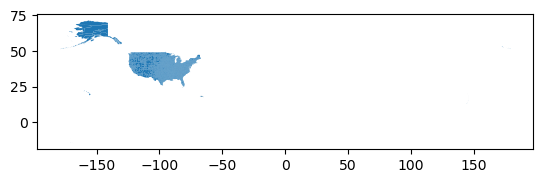

In [34]:
counties.plot()

In [35]:
counties_plot.columns.to_list()

['STATEFP',
 'COUNTYFP',
 'COUNTYNS',
 'AFFGEOID',
 'GEOID',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER',
 'geometry',
 'gis_join_match_code',
 'data_file_year',
 'state_name',
 'state_code',
 'county_name',
 'county_code',
 'area_name',
 'icpsr_state_code',
 'icpsr_county_code',
 'percent_of_free_population_who_are_foreign_born_males',
 'total_foreign_born_free_males',
 'total',
 'native-born_white_male',
 'native-born_white_female',
 'native-born_black_male',
 'native-born_black_female',
 'native-born_mulatto_male',
 'native-born_mulatto_female',
 'foreign-born_white_male',
 'foreign-born_white_female',
 'foreign-born_black_male',
 'foreign-born_black_female',
 'foreign-born_mulatto_male',
 'foreign-born_mulatto_female',
 'area_x',
 'perimeter_x',
 'co99_d90_',
 'co99_d90_i',
 'st',
 'co',
 'geometry_x',
 'area_y',
 'perimeter_y',
 'st99_d90_',
 'st99_d90_i',
 'geometry_y',
 '_merge',
 '_merged_results']

In [37]:
# rename column
counties_plot.rename(columns={'percent_of_free_population_who_are_foreign_born_males': 'percent_of_free_males_who_are_foreign_born_'}, inplace=True)

In [39]:
#thinking the column named geometry may be innacuarate for our purposes as it was based on more recent data, going to drop and replace with our other county geometry from longer ago 'geometry_x'
counties_plot = counties_plot.drop(columns = ['geometry'])
counties_plot.rename(columns={'geometry_x': 'geometry'}, inplace=True)

In [41]:
counties_plot['state_name'].value_counts()

state_name
Maine                   2820
Florida                 2467
Mississippi             2325
Kentucky                1398
Wisconsin               1383
North Carolina          1146
Texas                   1078
Virginia                1067
Michigan                1048
Alabama                  779
Illinois                 725
Georgia                  716
Missouri                 696
Indiana                  684
Iowa                     646
Tennessee                594
Ohio                     576
Louisiana                514
California               449
Arkansas                 431
Pennsylvania             382
Rhode Island             370
New York                 329
Kansas Territory         272
Massachusetts            248
Minnesota                214
Nebraska Territory       169
Oregon                   131
Maryland                 103
South Carolina            94
New Jersey                84
Vermont                   83
Washington Territory      67
Utah Territory            66
New

In [44]:
# make column numeric for plotting purposes
counties_plot['percent_of_free_males_who_are_foreign_born_'] = pd.to_numeric(counties_plot['percent_of_free_males_who_are_foreign_born_'], errors='coerce')

# Visualizations

## Percent of Foreign Born Free Males by Location

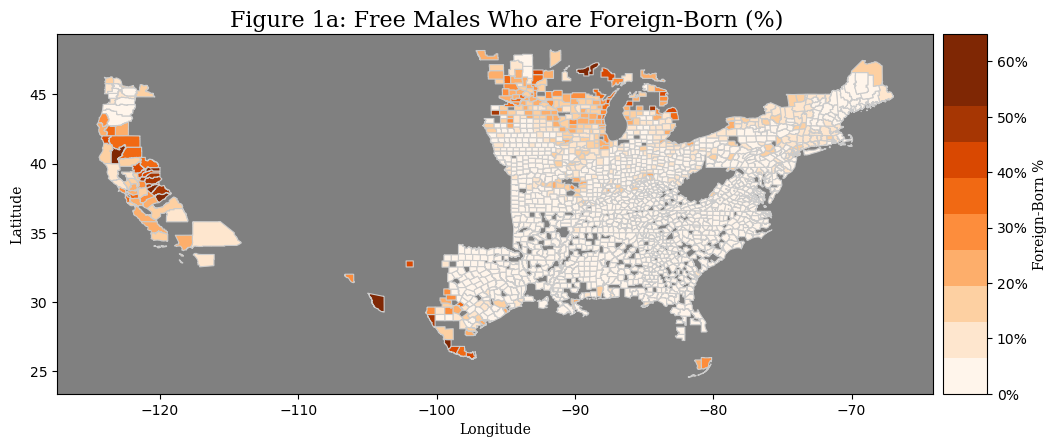

In [93]:
# imports
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

# Plot the GeoDataFrame using a heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set the background color to gray
ax.set_facecolor('gray')

# Define custom orange colors
orange_colors = [
    '#FFF5EB',  # Lightest
    '#FEE6CE',
    '#FDD0A2',
    '#FDAE6B',
    '#FD8D3C',
    '#F16913',
    '#D94801',
    '#A63603',
    '#7F2704',
    '#7F2704'   # Darkest
]

#create custom color map
custom_cmap = ListedColormap(orange_colors)

# Normalize the true percentage values to the range [0, 100] (may not be necessary)
norm = plt.Normalize(vmin=0, vmax=65)

# Create a ScalarMappable with the colormap and normalization
scalarmappable = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
scalarmappable.set_array([])  # Set an empty array to the ScalarMappable

# turn decimals into percentages
counties_plot['percent_of_free_males_who_are_foreign_born_map'] = counties_plot['percent_of_free_males_who_are_foreign_born_']*100

# Plot the GeoDataFrame using a heatmap
counties_plot.plot(column='percent_of_free_males_who_are_foreign_born_map', cmap=custom_cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Add axes labels
ax.set_xlabel('Longitude', fontname='serif')
ax.set_ylabel('Latitude', fontname='serif')

# Add a colorbar as a legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
colorbar = plt.colorbar(scalarmappable, cax=cax, format="%d%%")
colorbar.set_label("Foreign-Born %", fontname='serif')

# Set plot title
plt.suptitle("Figure 1a: Free Males Who are Foreign-Born (%)", fontsize=16, fontname='serif', x=0.5, y=0.75)

# save the image
plt.savefig('%heatmap_free_foreign_born_males.png', bbox_inches='tight')

# Show the plot
plt.show()

In [46]:
#number of individual observations from each state
counties_plot.state_name.value_counts()

state_name
Maine                   2820
Florida                 2467
Mississippi             2325
Kentucky                1398
Wisconsin               1383
North Carolina          1146
Texas                   1078
Virginia                1067
Michigan                1048
Alabama                  779
Illinois                 725
Georgia                  716
Missouri                 696
Indiana                  684
Iowa                     646
Tennessee                594
Ohio                     576
Louisiana                514
California               449
Arkansas                 431
Pennsylvania             382
Rhode Island             370
New York                 329
Kansas Territory         272
Massachusetts            248
Minnesota                214
Nebraska Territory       169
Oregon                   131
Maryland                 103
South Carolina            94
New Jersey                84
Vermont                   83
Washington Territory      67
Utah Territory            66
New

In [47]:
#unique counties
counties_plot.groupby('state_name')['county_name'].nunique()

state_name
Alabama                  52
Arkansas                 55
California               44
Connecticut               8
Delaware                  3
Florida                  38
Georgia                 132
Illinois                102
Indiana                  92
Iowa                     99
Kansas Territory         42
Kentucky                109
Louisiana                48
Maine                    16
Maryland                 22
Massachusetts            14
Michigan                 62
Minnesota                64
Mississippi              60
Missouri                113
Nebraska Territory       34
New Hampshire            10
New Jersey               21
New Mexico Territory     11
New York                 60
North Carolina           86
Ohio                     88
Oregon                   19
Pennsylvania             65
Rhode Island              5
South Carolina           30
Tennessee                84
Texas                   151
Utah Territory           24
Vermont                  14
Virginia 

In [48]:
#validate map and find states with highest percent

#make column numeric
counties_plot['percent_of_free_males_who_are_foreign_born_'] = pd.to_numeric(counties_plot['percent_of_free_males_who_are_foreign_born_'], errors='coerce')

top_counties = counties_plot[['state_name', 'percent_of_free_males_who_are_foreign_born_']].nlargest(400, 'percent_of_free_males_who_are_foreign_born_')

# Filter only states with unique values
top_counties.drop_duplicates(subset='state_name')

,state_name,percent_of_free_males_who_are_foreign_born_
21075,Minnesota,0.615385
23852,California,0.596783
22084,Texas,0.553448
24335,Michigan,0.498376
25080,Utah Territory,0.457143
24740,Washington Territory,0.448864
19092,Nebraska Territory,0.415612
1982,Wisconsin,0.368897
25069,New Mexico Territory,0.314313
7316,Oregon,0.289587


In [49]:
#Now going to create scaled map based on how many foreign born free males lived in each county

#let's find which columns we want to exploit
counties_plot.columns.to_list()

['STATEFP',
 'COUNTYFP',
 'COUNTYNS',
 'AFFGEOID',
 'GEOID',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER',
 'gis_join_match_code',
 'data_file_year',
 'state_name',
 'state_code',
 'county_name',
 'county_code',
 'area_name',
 'icpsr_state_code',
 'icpsr_county_code',
 'percent_of_free_males_who_are_foreign_born_',
 'total_foreign_born_free_males',
 'total',
 'native-born_white_male',
 'native-born_white_female',
 'native-born_black_male',
 'native-born_black_female',
 'native-born_mulatto_male',
 'native-born_mulatto_female',
 'foreign-born_white_male',
 'foreign-born_white_female',
 'foreign-born_black_male',
 'foreign-born_black_female',
 'foreign-born_mulatto_male',
 'foreign-born_mulatto_female',
 'area_x',
 'perimeter_x',
 'co99_d90_',
 'co99_d90_i',
 'st',
 'co',
 'geometry',
 'area_y',
 'perimeter_y',
 'st99_d90_',
 'st99_d90_i',
 'geometry_y',
 '_merge',
 '_merged_results',
 'percent_of_free_males_who_are_foreign_born_map']

In [50]:
#we're going to want to add up all of the foreign born male columns into one
# Create a new column 'total_foreign_born_male' by summing up the three columns

counties_plot['total_foreign_born_male'] = (
    counties_plot['foreign-born_white_male'] +
    counties_plot['foreign-born_black_male'] +
    counties_plot['foreign-born_mulatto_male']
)

counties_plot[['total_foreign_born_male']]

,total_foreign_born_male
0,71100
1,900
2,900
3,71100
4,900
...,...
25090,1400
25091,1300
25092,159900
25093,4000


In [51]:
counties_plot['foreign-born_white_male'].value_counts()

foreign-born_white_male
666      720
295      592
0        555
629      476
557      432
        ... 
14501      1
495        1
3011       1
1948       1
855        1
Name: count, Length: 926, dtype: int64

In [52]:
counties_plot['foreign-born_black_male'].value_counts()

foreign-born_black_male
0       20053
2        1472
1        1056
12        564
3         188
15        144
6         135
4         111
52         96
9          49
5          44
8          33
7          33
94         24
14         22
34         20
16         17
24         12
22          9
27          8
58          8
11          6
35          6
48          6
18          4
43          2
76          1
13          1
45          1
1277        1
Name: count, dtype: int64

In [53]:
counties_plot['foreign-born_mulatto_male'].value_counts()

foreign-born_mulatto_male
0     20428
2      1450
1      1164
9       412
5       210
3       146
35       96
8        48
4        39
10       32
55       24
6        23
14       12
15       10
17        8
63        8
91        6
12        3
16        3
76        1
39        1
13        1
78        1
Name: count, dtype: int64

In [54]:
counties_plot[['total_foreign_born_male']].value_counts()

total_foreign_born_male
66622                      720
29500                      592
000                        555
62921                      476
55702                      432
                          ... 
29730                        1
292101                       1
29100                        1
288900                       1
99900                        1
Name: count, Length: 998, dtype: int64

In [55]:
#number of individual observations from each county
counties_plot.county_name.value_counts()

county_name
Washington    2139
Franklin      1560
Jackson       1344
Jefferson     1040
Monroe        1003
              ... 
Gasconade        1
Yamhill          1
Yell             1
Irwin            1
St Croix         1
Name: count, Length: 1213, dtype: int64

**Issue arising where some data within the foreign born columns are Nan, we will replace with 0**

There are only 1212 observations in the total foreign born column

In [56]:
# List of columns to fill NaN values with 0
columns_to_fill = ['foreign-born_white_male', 'foreign-born_black_male', 'foreign-born_mulatto_male']

# Fill NaN values with 0 in the specified columns
counties_plot[columns_to_fill] = counties_plot[columns_to_fill].fillna(0)

In [57]:
#now there are no nan values
counties_plot['foreign-born_white_male'].isna().value_counts()

foreign-born_white_male
False    25095
Name: count, dtype: int64

In [61]:
#create total foreign born male column that sums all columns

# need to turn columns into integers instead of strings so that math operations work correctly
counties_plot['foreign-born_white_male'] = counties_plot['foreign-born_white_male'].astype(int)
counties_plot['foreign-born_black_male'] = counties_plot['foreign-born_black_male'].astype(int)
counties_plot['foreign-born_mulatto_male'] = counties_plot['foreign-born_mulatto_male'].astype(int)

# new column
counties_plot['total_foreign_born_male'] = (
    counties_plot['foreign-born_white_male'] +
    counties_plot['foreign-born_black_male'] +
    counties_plot['foreign-born_mulatto_male'])
counties_plot[['state_name', 'county_name', 'foreign-born_white_male', 'foreign-born_black_male', 'foreign-born_mulatto_male', 'total_foreign_born_male', 'geometry']].head()

,state_name,county_name,foreign-born_white_male,foreign-born_black_male,foreign-born_mulatto_male,total_foreign_born_male,geometry
0,Ohio,Highland,711,0,0,711,"POLYGON ((-83.59096 39.37868, -83.37286 39.377..."
1,Virginia,Highland,9,0,0,9,"POLYGON ((-79.31252 38.41175, -79.31826 38.409..."
2,Virginia,Highland,9,0,0,9,"POLYGON ((-79.31252 38.41175, -79.31826 38.409..."
3,Ohio,Highland,711,0,0,711,"POLYGON ((-83.59096 39.37868, -83.37286 39.377..."
4,Virginia,Highland,9,0,0,9,"POLYGON ((-79.31252 38.41175, -79.31826 38.409..."


In [67]:
# Let's Drop duplicate entries based on geometry coordinates to avoid overcounting, as can be seen in the above table
counties_plot = counties_plot.drop_duplicates(subset=['geometry'])
counties_plot[['state_name', 'county_name', 'foreign-born_white_male', 'foreign-born_black_male', 'foreign-born_mulatto_male', 'total_foreign_born_male', 'geometry']]

,state_name,county_name,foreign-born_white_male,foreign-born_black_male,foreign-born_mulatto_male,total_foreign_born_male,geometry
0,Ohio,Highland,711,0,0,711,"POLYGON ((-83.59096 39.37868, -83.37286 39.377..."
1,Virginia,Highland,9,0,0,9,"POLYGON ((-79.31252 38.41175, -79.31826 38.409..."
6,NaN,NaN,0,0,0,0,None
7,Florida,Escambia,399,2,1,402,"POLYGON ((-87.59895 30.99728, -87.25500 30.998..."
21,Alabama,Lawrence,16,0,0,16,"POLYGON ((-87.26066 34.75854, -87.25000 34.762..."
...,...,...,...,...,...,...,...
25008,Louisiana,East Baton Rouge,676,0,1,677,"POLYGON ((-90.84895 30.71913, -90.84408 30.707..."
25011,Louisiana,Assumption,288,0,1,289,"POLYGON ((-90.96358 30.06622, -90.96304 30.035..."
25013,Ohio,Van Wert,529,0,0,529,"POLYGON ((-84.80335 40.98916, -84.39948 40.990..."
25015,Florida,Alachua,51,0,0,51,"POLYGON ((-82.41895 29.92289, -82.41309 29.921..."


In [68]:
# check type of geometry
print(counties_plot['geometry'].geom_type.unique())

['Polygon' None]


In [71]:
# get rid of none types
counties_plot = counties_plot[counties_plot['geometry'].notna()]
print(counties_plot['geometry'].geom_type.unique())

['Polygon']


In [72]:
# Convert polygons to points (centroids), but name it under a new df so that boundaries remain for the plot
total_foreign_df = counties_plot.copy()
total_foreign_df['geometry'] = counties_plot['geometry'].centroid

# Check geometry types after conversion
print(counties_plot['geometry'].geom_type.unique())
print(total_foreign_df['geometry'].geom_type.unique())

['Polygon']
['Point']


## Total Foreign Born Free Males by Location

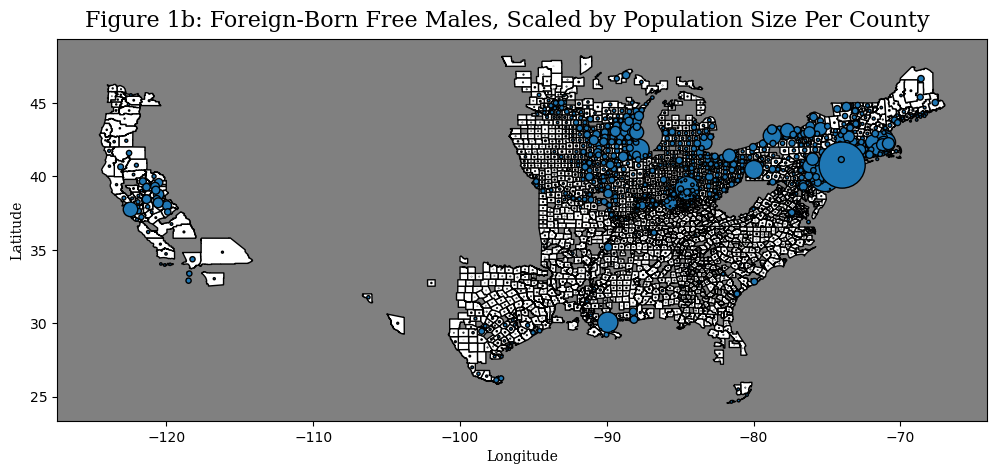

In [91]:
# Makes scaled map based on population per county
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set the background color to gray
ax.set_facecolor('gray')

# Plot counties
counties_plot.plot(edgecolor='black', color='white', ax=ax)

# Extract x and y coordinates from the geometry column
x_coords = total_foreign_df.geometry.x
y_coords = total_foreign_df.geometry.y

# Plot points with size based on 'total_foreign_born_male'
ax.scatter(x_coords, y_coords, edgecolor='black', s=counties_plot['total_foreign_born_male']*0.006)

# Set title
plt.suptitle("Figure 1b: Foreign-Born Free Males, Scaled by Population Size Per County", fontsize=16, fontname='serif', x=0.5, y=0.77)

# Add axes labels
ax.set_xlabel('Longitude', fontname='serif')
ax.set_ylabel('Latitude', fontname='serif')

# save image
plt.savefig('%scaled_population.png', bbox_inches='tight')


# Show the plot
plt.show()

In [95]:
# Find the top N counties with the highest populations
top_counties = counties_plot.nlargest(10, 'total_foreign_born_male')

# Display the result
print(top_counties[['state_name', 'county_name', 'total']])

          state_name   county_name   total
24949       New York      New York  813669
20983   Pennsylvania  Philadelphia  565529
24143       New York         Kings  279122
6558            Ohio      Hamilton  216410
16545       Illinois          Cook  144954
10928      Louisiana       Orleans  174491
22036  Massachusetts       Suffolk  192700
22040  Massachusetts       Suffolk  192700
22502   Pennsylvania     Allegheny  178831
23378       New York          Erie  141971
